<a href="https://colab.research.google.com/github/luigiselmi/timeseries/blob/main/forecasting_with_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting with Prophet

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [5]:
data_url = 'https://raw.githubusercontent.com/marcopeix/TimeSeriesForecastingInPython/refs/heads/master/data/daily_min_temp.csv'
df = pd.read_csv(data_url)
df.shape

(3650, 2)

In [7]:
df.head(1)

,Date,Temp
0,1981-01-01,20.7


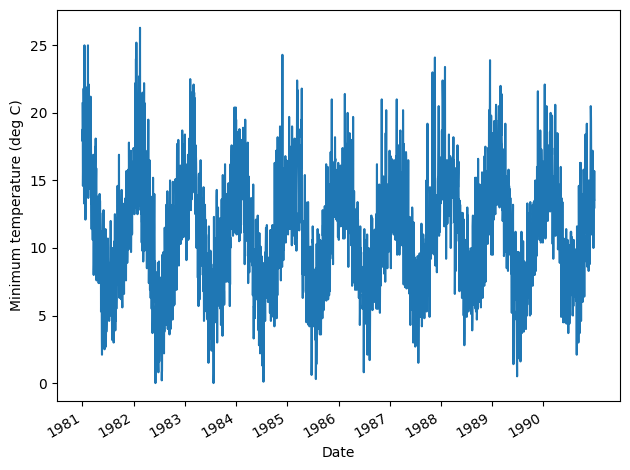

In [6]:
fig, ax = plt.subplots()
fig.autofmt_xdate()
ax.plot(df['Temp'])
ax.set_xlabel('Date')
ax.set_ylabel('Minimum temperature (deg C)')
plt.xticks(np.arange(0, 3649, 365), np.arange(1981, 1991, 1))
plt.tight_layout()

In [9]:
df.columns = ['ds', 'y']
df.head(1)

,ds,y
0,1981-01-01,20.7


In [10]:
train = df[:-365]
test = df[-365:]

In [11]:
m = Prophet()

In [12]:
m.fit(train);

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcu1yuoln/k1dlr3kf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcu1yuoln/z8rkjl8s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51655', 'data', 'file=/tmp/tmpcu1yuoln/k1dlr3kf.json', 'init=/tmp/tmpcu1yuoln/z8rkjl8s.json', 'output', 'file=/tmp/tmpcu1yuoln/prophet_model3tfguekv/prophet_model-20250310153126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:31:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:31:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [13]:
future = m.make_future_dataframe(periods=365)

In [16]:
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1981-01-01,11.928944,11.680999,18.887697,11.928944,11.928944,3.392934,3.392934,3.392934,-0.026439,-0.026439,-0.026439,3.419373,3.419373,3.419373,0.0,0.0,0.0,15.321877
1,1981-01-02,11.926893,11.794586,18.757813,11.926893,11.926893,3.471858,3.471858,3.471858,-0.009961,-0.009961,-0.009961,3.481818,3.481818,3.481818,0.0,0.0,0.0,15.398750
2,1981-01-03,11.924842,11.983496,18.933056,11.924842,11.924842,3.492967,3.492967,3.492967,-0.048858,-0.048858,-0.048858,3.541825,3.541825,3.541825,0.0,0.0,0.0,15.417809
3,1981-01-04,11.922791,11.827776,18.489591,11.922791,11.922791,3.409897,3.409897,3.409897,-0.188705,-0.188705,-0.188705,3.598602,3.598602,3.598602,0.0,0.0,0.0,15.332688
4,1981-01-05,11.920741,12.099554,18.807203,11.920741,11.920741,3.695081,3.695081,3.695081,0.043654,0.043654,0.043654,3.651426,3.651426,3.651426,0.0,0.0,0.0,15.615821


In [17]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-365:-360]

,ds,yhat,yhat_lower,yhat_upper
3285,1990-01-01,14.881155,11.379632,18.499867
3286,1990-01-02,15.007588,11.651090,18.512289
3287,1990-01-03,15.083988,11.288247,18.662186
3288,1990-01-04,14.992057,11.484721,18.539307
3289,1990-01-05,15.062318,11.596600,18.667019


In [18]:
test[['yhat', 'yhat_lower', 'yhat_upper']] = forecast[['yhat', 'yhat_lower', 'yhat_upper']]
test.head()

,ds,y,yhat,yhat_lower,yhat_upper
3285,1990-01-01,14.8,14.881155,11.379632,18.499867
3286,1990-01-02,13.3,15.007588,11.651090,18.512289
3287,1990-01-03,15.6,15.083988,11.288247,18.662186
3288,1990-01-04,14.5,14.992057,11.484721,18.539307
3289,1990-01-05,14.3,15.062318,11.596600,18.667019


In [19]:
test['baseline'] = train['y'][-365:].values

In [23]:
prophet_mae = mean_absolute_error(test['y'], test['yhat'])
baseline_mae = mean_absolute_error(test['y'], test['baseline'])
print('Model MAE: {:.2f}'.format(prophet_mae))
print('Baseline MAE: {:.2f}'.format(baseline_mae))

Model MAE: 1.94
Baseline MAE: 2.87


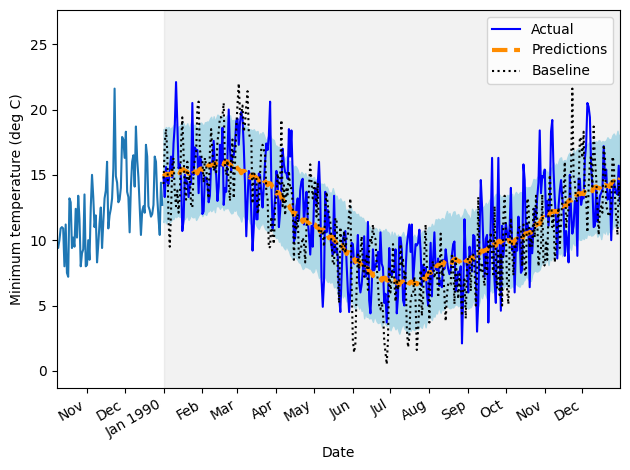

In [24]:
fig, ax = plt.subplots()
fig.autofmt_xdate()
ax.plot(train['y'])
ax.plot(test['y'], 'b-', label='Actual')
ax.plot(test['yhat'], color='darkorange', ls='--', lw=3, label='Predictions')
ax.plot(test['baseline'], 'k:', label='Baseline')
ax.set_xlabel('Date')
ax.set_ylabel('Minimum temperature (deg C)')
ax.axvspan(3285, 3649, color='#808080', alpha=0.1)
ax.legend(loc='best')

plt.xticks(
    [3224, 3254, 3285, 3316, 3344, 3375, 3405, 3436, 3466, 3497, 3528, 3558, 3589, 3619],
    ['Nov', 'Dec', 'Jan 1990', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.fill_between(x=test.index, y1=test['yhat_lower'], y2=test['yhat_upper'], color='lightblue')
plt.xlim(3200, 3649)
plt.tight_layout()